## Introduction:
Air pollution poses significant health risks and environmental challenges worldwide. Monitoring and forecasting air quality levels, particularly the concentration of fine particulate matter (PM2.5), are crucial for public health management and policy-making. In this project, we aim to develop a predictive model using deep learning techniques to forecast PM2.5 concentration based on various environmental factors such as temperature, humidity, pressure, wind speed, and wind direction.

## Outline:

1. Data Exploration and Preprocessing:
2. Feature Engineering
3. Data Preparation
4. Model Development
5. Model Evaluation
6. Visualize predicted vs. actual PM2.5 concentration.
7. Use the trained model to forecast PM2.5 concentration for the next 24 hours.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [2]:
# load the dataset
df=pd.read_csv(r"C:\Users\Hp\Downloads\PRSA_data_2010.1.1-2014.12.31.csv")
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


## Exploratory Data Analysis

In [3]:
# shape
df.shape

(43824, 13)

In [4]:
# checking for null values
df.isnull().sum()

No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [5]:
# checking for duplicate values
df.duplicated().sum()

0

In [6]:
# data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [7]:
# descriptive statistics
df.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


In [8]:
# Handling missing values in pm2.5 column
# we shall drop rows with missing values since represents less than  5% of our datset
df.dropna(inplace=True)

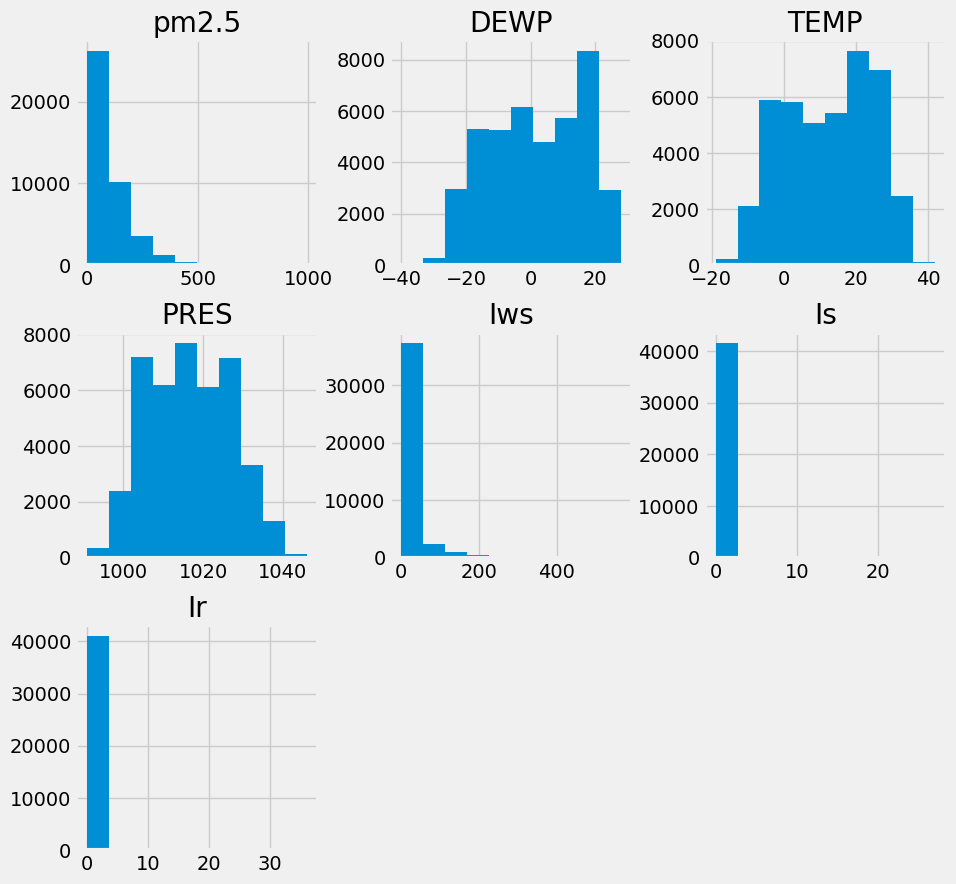

In [9]:
# visualizing distribution of pm2.5,DEWP,TEMP,PRES,lws,ls
import matplotlib.style as styles
styles.use("fivethirtyeight")
df.iloc[:,5:].hist(figsize=(10,10))
plt.show()

In [10]:
# check for correlations
corr_matrix=df.iloc[:,5:].corr()
corr_matrix['pm2.5']

C:\Users\Hp\AppData\Local\Temp\ipykernel_13472\552248542.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.iloc[:,5:].corr()


pm2.5    1.000000
DEWP     0.171423
TEMP    -0.090534
PRES    -0.047282
Iws     -0.247784
Is       0.019266
Ir      -0.051369
Name: pm2.5, dtype: float64

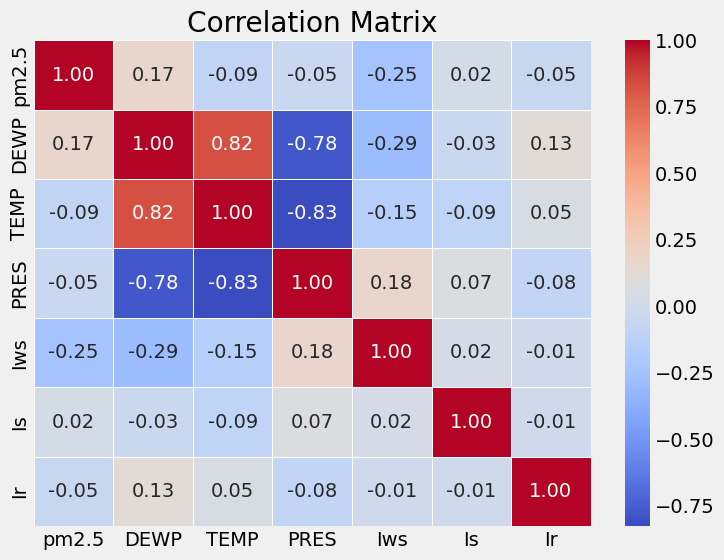

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt=".2f",linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

## Feature Engineering

In [12]:
# we shall create a datetime column by combining year,month,day and hour
df['Date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df['Date'].head()

24   2010-01-02 00:00:00
25   2010-01-02 01:00:00
26   2010-01-02 02:00:00
27   2010-01-02 03:00:00
28   2010-01-02 04:00:00
Name: Date, dtype: datetime64[ns]

In [13]:
# delete month,year,day and hour columns and No columns
df=df.drop(['month','year','day','hour','No'],axis=1)
#  set our newly created column as the index
df=df.set_index('Date',drop=True)
df.head()

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
Date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


## visualizing the pm2.5 column over time

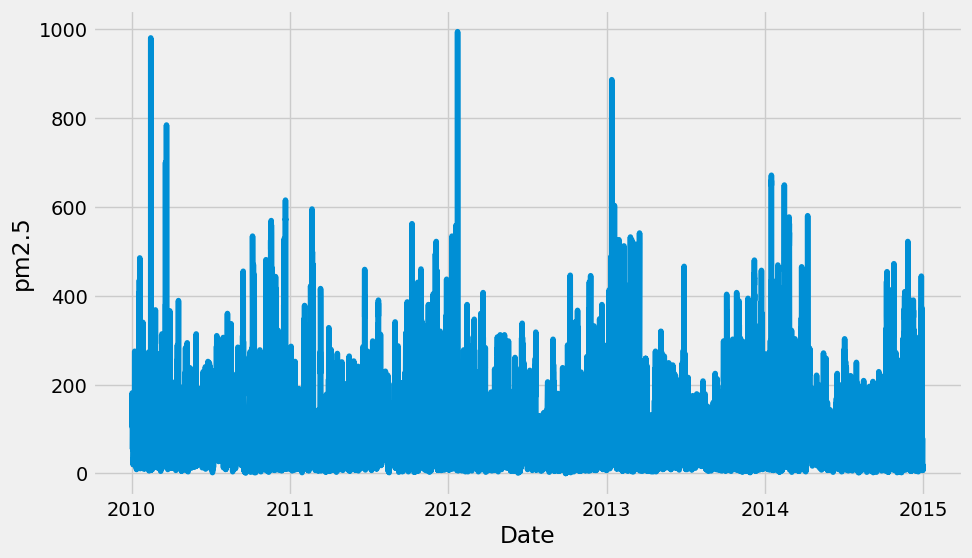

In [14]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('pm2.5')
plt.plot(df["pm2.5"])
plt.show()

The series was recorded evry Hour for the 6 year period . This is too granular for effective visualization we shall downsample to monthly series for effective visualization 

C:\Users\Hp\AppData\Local\Temp\ipykernel_13472\3609909706.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_data=df.resample('M').mean()


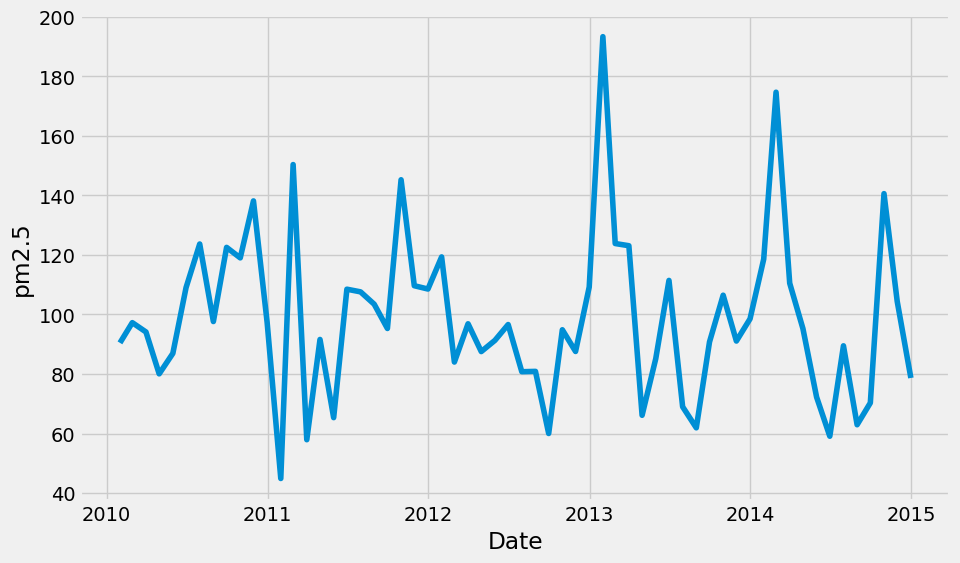

In [15]:
# downsample the series to Monthly Data 
monthly_data=df.resample('M').mean()
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('pm2.5')
plt.plot(monthly_data["pm2.5"])
plt.show()

## Analysis of a Seasonality and Patterns

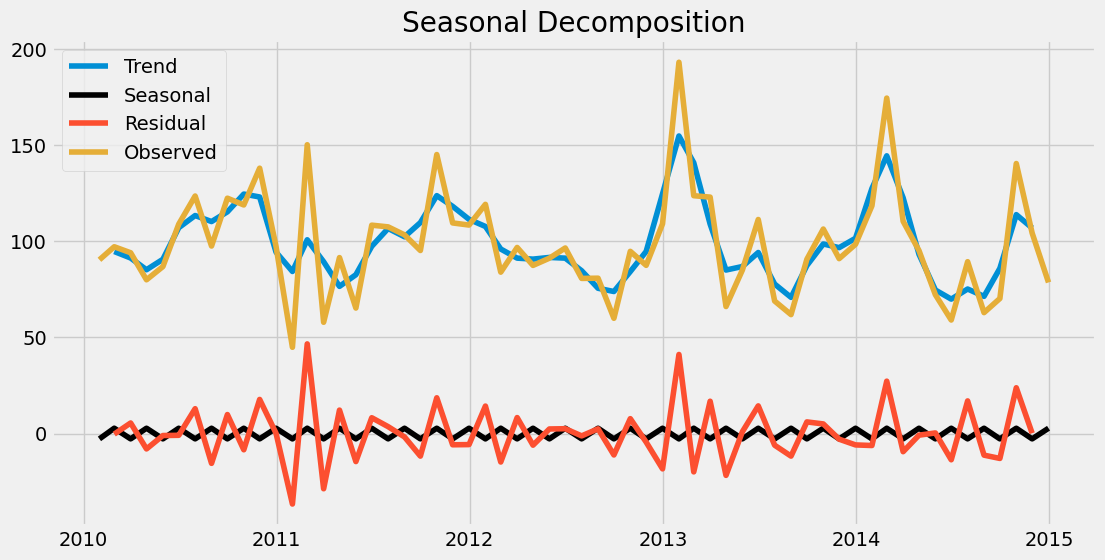

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
fig, ax = plt.subplots(figsize=(12, 6))

# Perform seasonal decomposition
decomposition = seasonal_decompose(monthly_data['pm2.5'], model='additive', period=2)

# Plot the decomposition components individually
ax.plot(decomposition.trend, label='Trend')
ax.plot(decomposition.seasonal, label='Seasonal',color='black')
ax.plot(decomposition.resid, label='Residual')
ax.plot(decomposition.observed, label='Observed')

# Set title and legend
ax.set_title('Seasonal Decomposition')
ax.legend()

# Show the plot
plt.show()

In [17]:
## One Hot Encoding categorical variables
df=pd.get_dummies(df,columns=['cbwd'],drop_first=True)

In [18]:
print(df.columns)

Index(['pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir', 'cbwd_NW',
       'cbwd_SE', 'cbwd_cv'],
      dtype='object')


## Normalization

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

df[['pm2.5','DEWP','TEMP','PRES','Iws']]=scaler.fit_transform(df[['pm2.5','DEWP','TEMP','PRES','Iws']])

## Create Sequences for LSTM Model

In [20]:
def create_sequences(data,n_steps):
    X,y=[],[]
    for i in range(len(data)-n_steps):
        X.append(data[i:(i+n_steps),:]) #Input sequence
        y.append(data[i+n_steps,0]) # Target Variable pm2.5
    return np.array(X),np.array(y)

## Split into train and test sets 

In [21]:
train_size=int(len(df)*0.8)
test_size=len(df)-train_size
train,test=df.iloc[:train_size],df.iloc[train_size:]

In [22]:
X_train,y_train=create_sequences(train[['pm2.5','DEWP','TEMP','PRES','Iws','cbwd_NW','cbwd_SE','cbwd_cv']].values,24*60)
X_test,y_test=create_sequences(test[['pm2.5','DEWP','TEMP','PRES','Iws','cbwd_NW','cbwd_SE','cbwd_cv']].values,24*60)

**LSTM MODEL**

In [23]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [24]:
# initialising the model
from keras import metrics
model=Sequential()
# Adding LSTM layers
model.add(LSTM(32,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(LSTM(32,return_sequences=True))
model.add(Flatten())
model.add(Dense(16))
# output layer
model.add(Dense(1))
# compiling the model
model.compile(optimizer='adam',
             loss='mean_squared_error',
             metrics=[metrics.MeanAbsoluteError()])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1440, 32)          5248      
                                                                 
 lstm_1 (LSTM)               (None, 1440, 32)          8320      
                                                                 
 flatten (Flatten)           (None, 46080)             0         
                                                                 
 dense (Dense)               (None, 16)                737296    
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 750881 (2.86 MB)
Trainable params: 750881 (2.86 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
import tensorflow as tf
# early stopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
# fitting the model
history=model.fit(X_train,y_train,batch_size=32,epochs=10)

Epoch 1/10
999/999 [==============================] - 1329s 1s/step - loss: 0.3806 - mean_absolute_error: 0.1482
Epoch 2/10
999/999 [==============================] - 1260s 1s/step - loss: 0.0048 - mean_absolute_error: 0.0527
Epoch 3/10
999/999 [==============================] - 1311s 1s/step - loss: 0.0046 - mean_absolute_error: 0.0519
Epoch 4/10
999/999 [==============================] - 1293s 1s/step - loss: 0.0043 - mean_absolute_error: 0.0506
Epoch 5/10
999/999 [==============================] - 1266s 1s/step - loss: 0.0036 - mean_absolute_error: 0.0457
Epoch 6/10
999/999 [==============================] - 1262s 1s/step - loss: 0.0030 - mean_absolute_error: 0.0415
Epoch 7/10
999/999 [==============================] - 1257s 1s/step - loss: 0.0024 - mean_absolute_error: 0.0365
Epoch 8/10
999/999 [==============================] - 1276s 1s/step - loss: 0.0020 - mean_absolute_error: 0.0333
Epoch 9/10
999/999 [==============================] - 1270s 1s/step - loss: 0.0018 - mean_absolu

In [26]:
model.save('mymodel.keras')

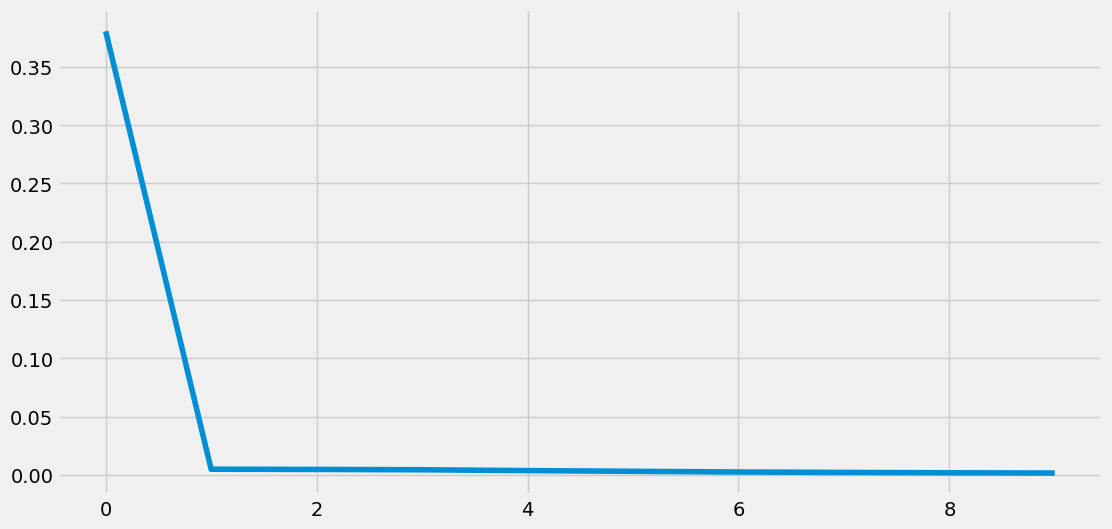

In [27]:
history=model.history.history["loss"]
plt.figure(figsize=(12,6))
plt.plot(range(len(history)),history)

## Inverse Transform & Make a prediction

In [42]:
predictions=model.predict(X_test)
# reshape predictions to be compatible with the scaler
predictions_reshaped=np.zeros((len(predictions),5))
predictions_reshaped[:,0]=predictions.flatten()
predictions_original=scaler.inverse_transform(predictions_reshaped)[:,0]

y_test_reshaped=np.zeros((len(y_test),5))
y_test_reshaped[:,0]=y_test
y_test_original=scaler.inverse_transform(y_test_reshaped)[:,0]

216/216 [==============================] - 79s 366ms/step


## Visualize the predicted values

In [45]:
n_steps=24*60
date_index=test.index[n_steps:] 
frame=pd.DataFrame({'Original Value':y_test_original,'predictions':predictions_original},index=date_index)
print(frame.head(10))

                     Original Value  predictions
Date                                            
2014-03-15 07:00:00            93.0    98.693059
2014-03-15 08:00:00           116.0    93.434664
2014-03-15 09:00:00            99.0    98.996611
2014-03-15 10:00:00            88.0   100.835386
2014-03-15 11:00:00            91.0    91.674924
2014-03-15 12:00:00           109.0    80.017762
2014-03-15 13:00:00           110.0    75.831472
2014-03-15 14:00:00           109.0    81.720447
2014-03-15 15:00:00           123.0    90.798586
2014-03-15 16:00:00           136.0   103.428036


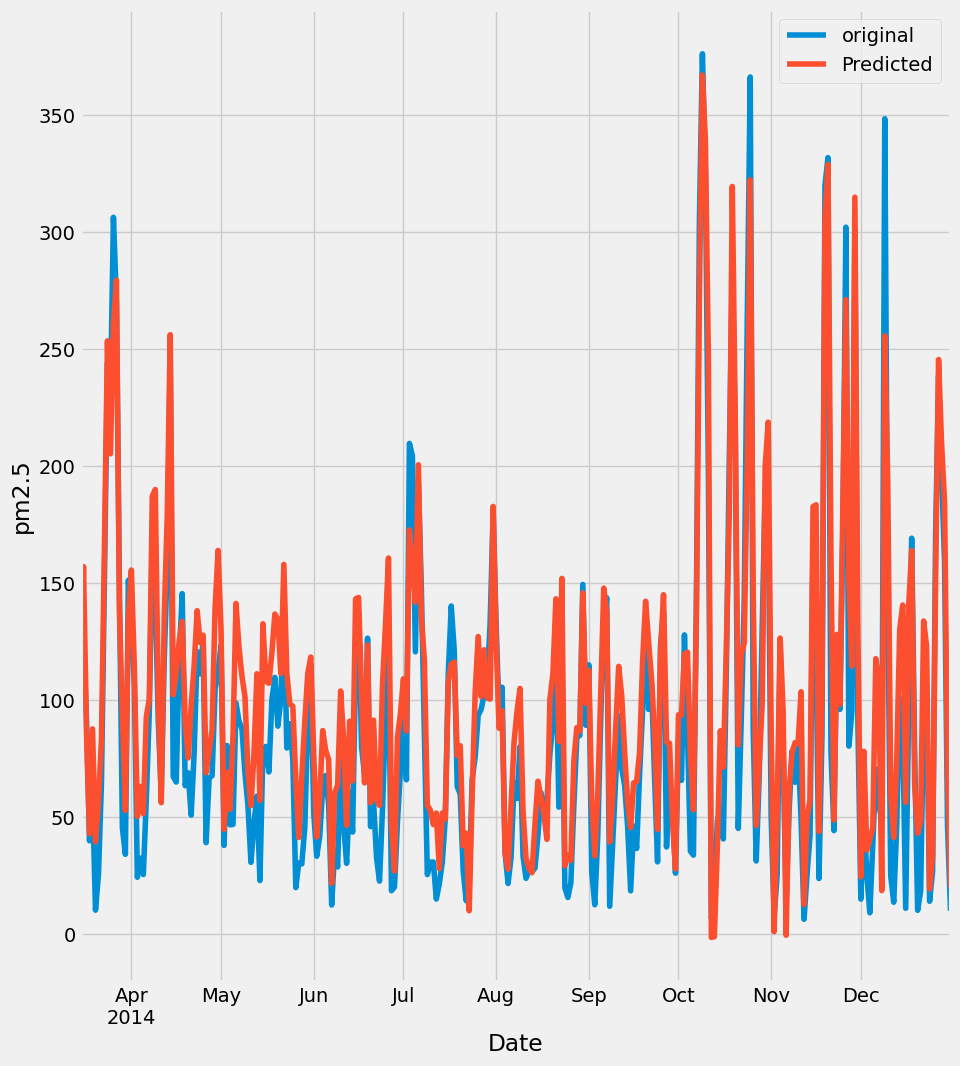

In [51]:
# downsample and visualize
plt.figure(figsize=(10,12))
monthly_data=frame.resample('D').mean()
monthly_data['Original Value'].plot(label='original')
monthly_data['predictions'].plot(label='Predicted')
plt.xlabel('Date')
plt.ylabel('pm2.5')
plt.legend()
plt.show()

## RMSE

In [52]:
# Model RMSE
error=mean_squared_error(frame['Original Value'],frame['predictions'])
print(error**0.5)

40.47472907487073


## Make a Forecast

In [62]:
most_recent_data = X_test[-n_steps:, :]


# Forecast 24 hours ahead
forecasted_values = []
for _ in range(24):
    # Predict  for the next day
    forecast = model.predict(most_recent_data)
    forecasted_values.append(forecast[0, 0])  
    
    # Update most_recent_data for the next iteration
    most_recent_data = np.roll(most_recent_data, -1, axis=1)  # Shift the array to the left
    most_recent_data[0, -1, 0] = forecast[0, 0]  # Update the last value with the forecasted pm2.5
    # You may need to update other features as well if they are used in the model

# Step 5: Inverse transform the predicted values
forecasted_reshaped=np.zeros((len(forecasted_values),5))
forecasted_reshaped[:,0]=forecasted_values
forecasted_values_original=scaler.inverse_transform(forecasted_reshaped)[:,0]
#forecasted_values_original = scaler.inverse_transform(np.array(forecasted_values).reshape(-1, 1))


45/45 [==============================] - 16s 364ms/step


In [68]:
date_index=pd.date_range(test.index[-1],periods=24,freq="h")
data=pd.Series(forecasted_values_original,index=date_index)
data

2014-12-31 23:00:00    223.039143
2015-01-01 00:00:00    219.638719
2015-01-01 01:00:00    230.379433
2015-01-01 02:00:00    245.210532
2015-01-01 03:00:00    258.427282
2015-01-01 04:00:00    269.396867
2015-01-01 05:00:00    278.894105
2015-01-01 06:00:00    279.270975
2015-01-01 07:00:00    284.362338
2015-01-01 08:00:00    292.829062
2015-01-01 09:00:00    297.146244
2015-01-01 10:00:00    299.054828
2015-01-01 11:00:00    298.379856
2015-01-01 12:00:00    295.882002
2015-01-01 13:00:00    294.108620
2015-01-01 14:00:00    287.320571
2015-01-01 15:00:00    284.333425
2015-01-01 16:00:00    277.612444
2015-01-01 17:00:00    276.401612
2015-01-01 18:00:00    275.558350
2015-01-01 19:00:00    263.772311
2015-01-01 20:00:00    262.187098
2015-01-01 21:00:00    252.724786
2015-01-01 22:00:00    249.457876
Freq: H, dtype: float64

In conclusion, this project represents a significant step forward in leveraging advanced machine learning techniques to address pressing environmental challenges, particularly in the realm of air quality forecasting. By developing and training an LSTM neural network model, we have successfully demonstrated its effectiveness in predicting PM2.5 concentration based on a diverse set of environmental variables.

In [78]:
!jupyter nbconvert --to webpdf --allow-chromium-download PM2.5_forecasting_model.ipynb

[NbConvertApp] Converting notebook PM2.5_forecasting_model.ipynb to webpdf
[NbConvertApp] Building PDF
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 781416 bytes to PM2.5_forecasting_model.pdf
